1. Read Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Visualization

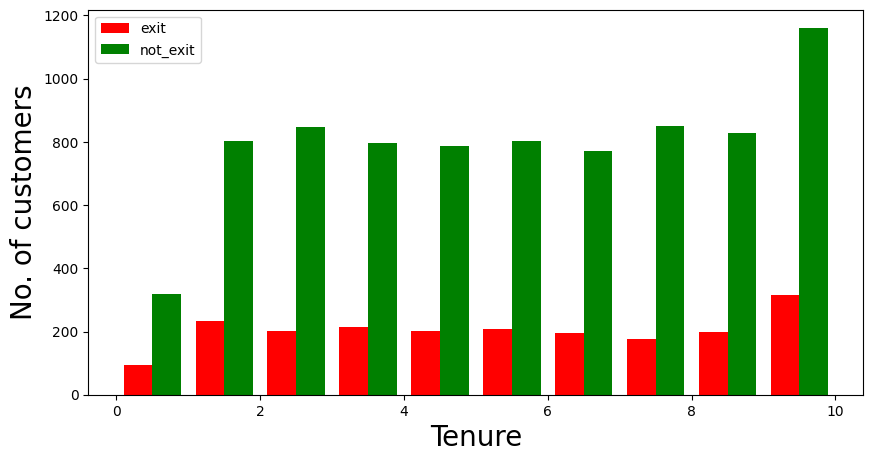

In [11]:
def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()

df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

visualization(df_churn_exited, df_churn_not_exited, "Tenure")

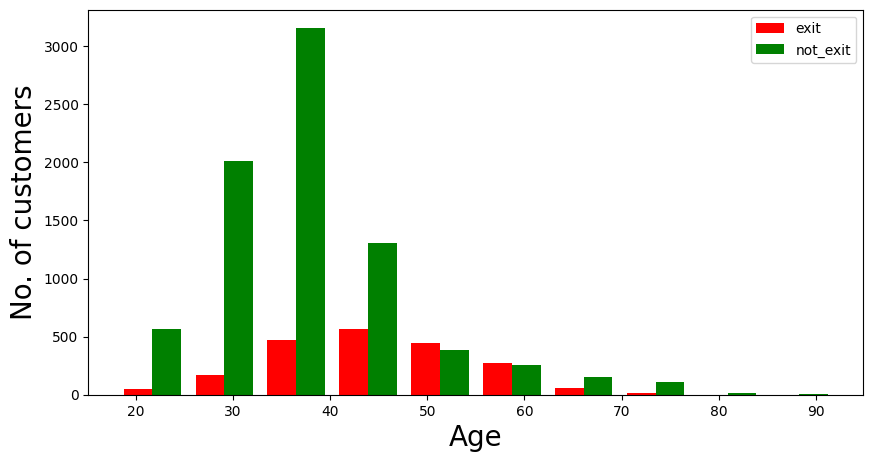

In [12]:
df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']
visualization(df_churn_exited2,df_churn_not_exited2, 'Age')

Converting the Categorical values

In [13]:
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
states = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)

df = pd.concat([df, gender, states], axis = 1)

In [14]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,1,0


2. Splittng Training and Testing Dataset

In [15]:
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain']]
y=df[['Exited']]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

3. Normalizing the values with mean as 0 and Standard Deviation as 1

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train

array([[ 0.44785907,  1.70521233,  1.0255676 , ...,  0.92189712,
        -0.58130929,  1.76705887],
       [-1.89439831,  1.70521233, -1.4121143 , ...,  0.92189712,
        -0.58130929, -0.5659121 ],
       [ 0.24149278, -1.60808538, -0.71563376, ...,  0.92189712,
        -0.58130929, -0.5659121 ],
       ...,
       [-1.44039247,  0.56922455, -0.01915321, ...,  0.92189712,
        -0.58130929, -0.5659121 ],
       [ 2.05751612,  0.4745589 ,  0.67732733, ...,  0.92189712,
        -0.58130929,  1.76705887],
       [-0.30537789,  1.32654974,  1.37380787, ...,  0.92189712,
        -0.58130929,  1.76705887]])

In [19]:
X_test

array([[-0.56333575,  1.70521233,  0.32908706, ...,  0.92189712,
        -0.58130929,  1.76705887],
       [-0.65620058,  0.75855584,  0.32908706, ...,  0.92189712,
        -0.58130929, -0.5659121 ],
       [-1.61580382, -0.56676324, -1.4121143 , ..., -1.08471974,
        -0.58130929, -0.5659121 ],
       ...,
       [-0.66651889, -0.66142889, -1.4121143 , ...,  0.92189712,
        -0.58130929, -0.5659121 ],
       [-0.84193024, -0.37743194, -1.06387403, ...,  0.92189712,
         1.72025464, -0.5659121 ],
       [-0.28474126, -0.56676324, -1.06387403, ...,  0.92189712,
         1.72025464, -0.5659121 ]])

4. Initialize and build model using keras

In [20]:
import keras
from keras.models import Sequential #To create sequential neural network
from keras.layers import Dense #To create hidden layers

classifier = Sequential()

classifier.add(Dense(activation = "relu",input_dim = 11,units = 6,kernel_initializer = "uniform"))

classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform"))   #Adding second hidden layers

classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform"))

classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy'])

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
classifier.fit(X_train,y_train,batch_size=10,epochs=50)  #fitting the ANN to training dataset

Epoch 1/50
700/700 [==============================] - 3s 3ms/step - loss: 0.4924 - accuracy: 0.7981
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4252 - accuracy: 0.7981
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4189 - accuracy: 0.7981
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4138 - accuracy: 0.8153
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4110 - accuracy: 0.8273
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4085 - accuracy: 0.8309
Epoch 7/50
700/700 [==============================] - 2s 2ms/step - loss: 0.4071 - accuracy: 0.8334
Epoch 8/50
700/700 [==============================] - 2s 2ms/step - loss: 0.4047 - accuracy: 0.8361
Epoch 9/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4042 - accuracy: 0.8370
Epoch 10/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4032 - accuracy: 0.8361

5. Print the accuracy score and confusion matrix

In [22]:
y_pred =classifier.predict(X_test)
print(y_pred)
print(y_pred.shape)
y_pred = (y_pred > 0.5) #Predicting result
print(y_pred)

94/94 [==============================] - 1s 3ms/step
[[0.12116186]
 [0.34237853]
 [0.08133538]
 ...
 [0.03205701]
 [0.1430201 ]
 [0.09116478]]
(3000, 1)
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

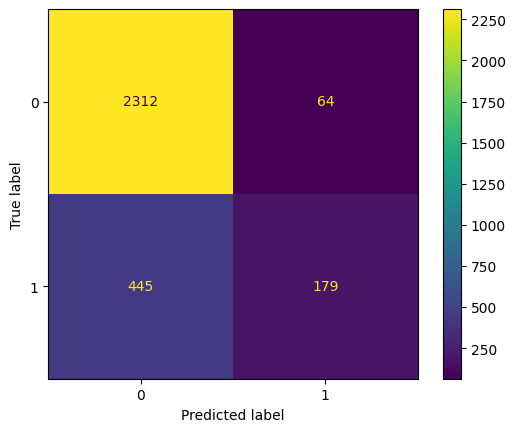

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred)
cm

array([[2312,   64],
       [ 445,  179]])

In [24]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8303333333333334

Text(95.72222222222221, 0.5, 'Truth')

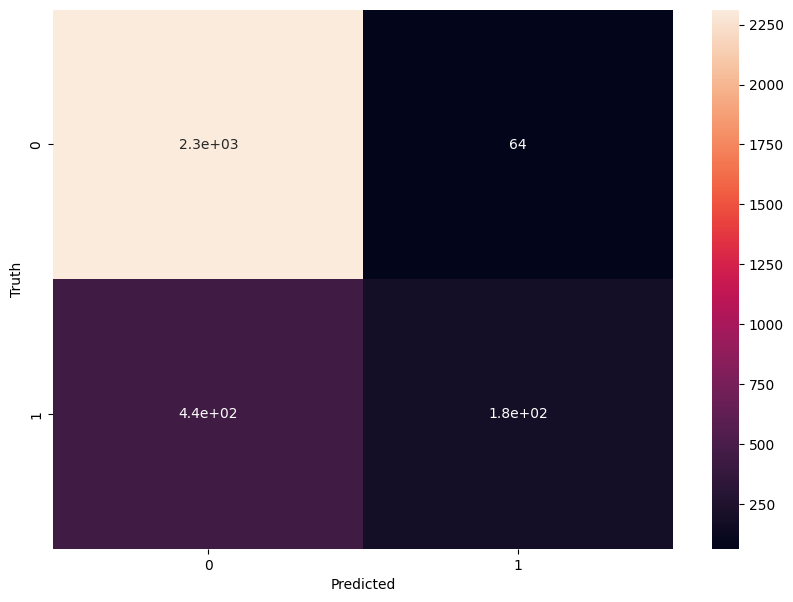

In [25]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2376
           1       0.74      0.29      0.41       624

    accuracy                           0.83      3000
   macro avg       0.79      0.63      0.66      3000
weighted avg       0.82      0.83      0.80      3000



In [27]:
new_customer = [[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]
new_customer = sc.transform(sc.transform(new_customer))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
new_prediction = classifier.predict(new_customer)
new_prediction

1/1 [==============================] - 0s 31ms/step


array([[0.]], dtype=float32)

In [29]:
new_prediction = (new_prediction > 0.5)
new_prediction

array([[False]])